# Penguins Dataset Simple Linear Regression - Fitting Linear Feature

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

## Load Dataset

In [56]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

### Display the initial number of rows and columns.

In [57]:
df.shape

(344, 7)

### Display the initial variable names and their associated data types.

In [58]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [59]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [60]:
df_clean = df.dropna().copy()

In [61]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Display the number of unique values for each column after removing missing data and before initial exploration.

In [62]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [63]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [64]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

## Data Standardization

### Examine raw numeric features magnitude and scale.

The actual values in the boxplot represent the distributions of the penguin dataset’s numeric features: bill length (mm), bill depth (mm), flipper length (mm), and body mass (g). The plot shows that body mass is on a much larger scale than the other features, indicating that its values are much higher (in grams) compared to the millimeter measurements of the other features, which is important for understanding feature scaling and the need for standardization in data analysis.

In [65]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


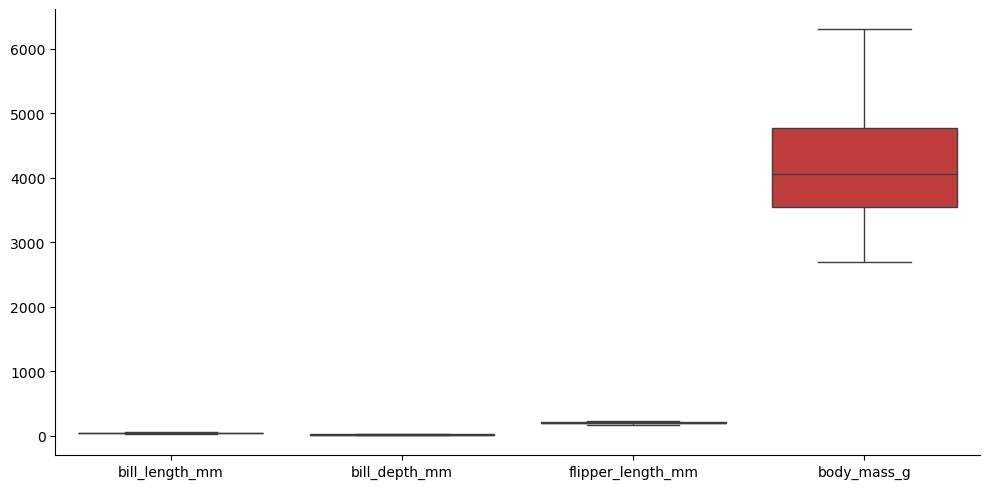

In [66]:
sns.catplot(data=df_clean, 
            kind='box', 
            aspect=2)
plt.show()

### Prepare the dataset by extracting our numeric features.

In [67]:
df_clean_features = df_clean.select_dtypes('number').copy()

### Standardize the numeric features.

In [68]:
X = StandardScaler().fit_transform(df_clean_features)

### Examine standarized numeric features magnitude and scale.

After standardization, all numeric features (bill length, bill depth, flipper length, and body mass) have similar distributions centered around zero with comparable spread, indicating that differences in scale have been removed and the features are now suitable for clustering and other analyses that assume equal variance.

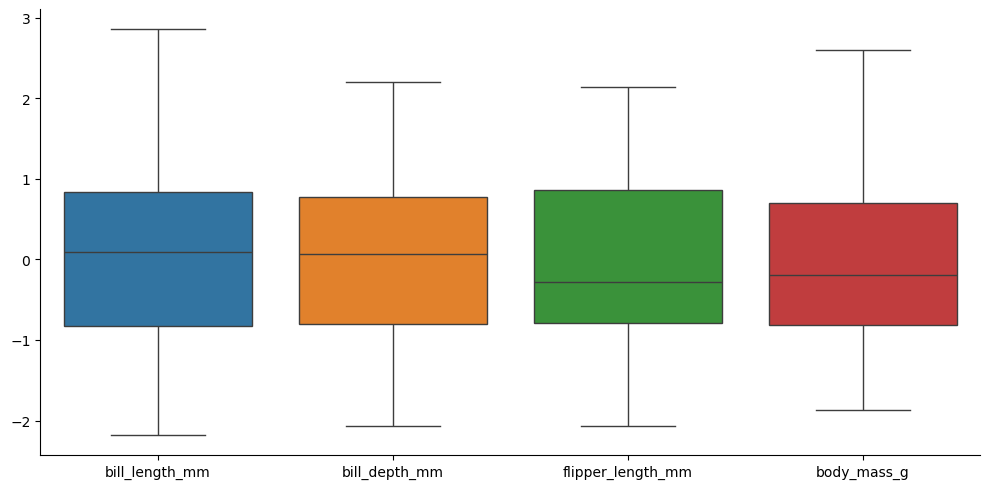

In [69]:
sns.catplot(data=pd.DataFrame(X, 
                              columns=df_clean_features.columns), 
                              kind='box', 
                              aspect=2)
plt.show()

## Simple Linear Regression - Fitting a Linear Feature

### We will fit a linear model between the input `flipper_length_mm` and the output `body_mass_g` assuming a linear relationship between the trend and the input.

$\mu = \beta_0 + \beta_1 \times x$

$\mu$ **predicted trend**

$\beta_0$ **intercept**: value of $\mu$ when $x = 0$

$\beta_1$ **slope**: change in $\mu$ for a one-unit increase in $x$

$x$ **feature** or **input variable**: independent variable used to predict $\mu$

In [70]:
lm_fit = smf.ols(formula='body_mass_g ~ flipper_length_mm', 
                 data=df_clean). \
                 fit()

In [71]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          3.13e-105
Time:                        19:46:43   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The `.params` attribute stores the coefficient estimates as they minimize the sum of squared errors.

* The **slope**, 50.15, describes how much the predicted body mass changes for each additional millimeter of flipper length.
  
* The **intercept**, -5872.09, is a mathematical result that helps position the regression line but isn’t physically meaningful for penguins, since the data doesn’t include flipper lengths near zero.

In [72]:
lm_fit.params

Intercept           -5872.092683
flipper_length_mm      50.153266
dtype: float64

### The standard error on the estimate is contained in the `.bse` attribute.

* The **standard error** for the **intercept**, 310.29, indicates that, if we repeatedly sampled penguins and fit the same model, the estimated starting body mass, -5872.09, would typically vary by about 310 grams between samples, showing the precision of this baseline estimate.

* The **standard error** for the flipper length coefficient, 1.54, means our estimate that each additional millimeter of flipper length increases a penguin’s body mass by 50.15 grams is quite precise, with typical variation of only 1.54 grams across samples.

* These small **standard errors** demonstrate that, for the penguins in the dataset, both the baseline body mass and the effect of flipper length are estimated with high statistical confidence.

* They are considered to have high statistical confidence because the **standard errors** for both the **intercept**, 310.29, and the flipper length coefficient, 1.54, are small relative to the estimated values, –5872.09 and 50.15, respectively. 
  
* This means that if you repeatedly sampled penguins and fit the same regression model, the estimates for the intercept and slope would vary only slightly from sample to sample.

In [73]:
lm_fit.bse

Intercept            310.285155
flipper_length_mm      1.540231
dtype: float64

### We can use the $\pm1$ and $\pm2$ standard error intervals to know how trustworthy the estimate is.

* The most common standard error interval is the $\pm2$ standard error interval because that is approximately equal to the 95% confidence interval.

* We are 95% confident that the coefficient is somewhere between 47 and 53.

* The below are approximations as we will get the exact values with `.conf_int()`.

In [74]:
lm_fit.params - 2 * lm_fit.bse

Intercept           -6492.662994
flipper_length_mm      47.072804
dtype: float64

In [75]:
lm_fit.params + 2 * lm_fit.bse

Intercept           -5251.522372
flipper_length_mm      53.233728
dtype: float64

In [76]:
lm_fit.conf_int(). \
       rename(columns={0: 'ci_lwr',
                       1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,-6482.472236,-5261.713130
flipper_length_mm,47.123390,53.183142


### The P-values for the coefficients are used to identify the **statistically significant** of the input.

* A **statistically significent** input one that has a **p-value** less than 0.05 which means if this is the case, we have a **statistically significient** input or feature.

* These values are extremely small and much lower than 0.05 so they indicate very strong **statistical significance** for both parameters. 

In [77]:
lm_fit.pvalues

Intercept             1.183941e-54
flipper_length_mm    3.132836e-105
dtype: float64

In [78]:
lm_fit.pvalues < 0.05

Intercept            True
flipper_length_mm    True
dtype: bool

### Visualize the coefficient estimates as markers in a scatter plot and the confidence intervals as error bars. 

* We are confident that the 95% confidence interval does NOT contain zero as both `flipper_length_mm` and the **intercept** are not touching the zero grey dotted line.

* The **intercept** is **statistically significantly negative**; the **slope** is negative, and the `flipper_length_mm` is **statistically significantly positive**; the **slope** is positive.

* **We are confident the slope is positive for the `flipper_length_mm`, therefore we are confident that the average output is increasing as the input or feature is increasing.**

In [79]:
def my_coefplot(
    model,
    var,
    xerr_mult=2,
    color='k',
    ecolor='k',
    elinewidth=2,
    ms=10,
    vline=0,
    xlabel='coefficient value',
    title=None,
    figsize=(7, 2.5),
    xlim=None):
    """
    Plots a single coefficient with error bars from a statsmodels model.

    Params:
        model: fitted statsmodels model
        var: variable name (str), e.g. 'Intercept' or 'I(flipper_length_mm ** 2)'
        xerr_mult: multiplier for error bars (default 2)
        color: marker color
        ecolor: error bar color
        elinewidth: error bar line width
        ms: marker size
        vline: where to draw the vertical reference line (default 0)
        xlabel: x-axis label (default 'coefficient value')
        title: figure title (default None, uses variable name)
        figsize: tuple, figure size
        xlim: tuple, x-axis limits (optional, auto if None)
    """
    # Get coefficient and error values
    coef = model.params[var]
    err = xerr_mult * model.bse[var]

    # Create the plot
    _, ax = plt.subplots(figsize=figsize)
    ax.errorbar(
        y = [var],
        x = [coef],
        xerr = [err],
        fmt='o',
        color=color,
        ecolor=ecolor,
        elinewidth=elinewidth,
        ms=ms)

    # Add vertical line for reference
    ax.axvline(x=vline, 
               linestyle='--', 
               linewidth=4, 
               color='grey')
    ax.set_xlabel(xlabel)
    if title is None:
        title = f"Coefficient Plot for '{var}'"
    ax.set_title(title)

    # Always include zero in xlim, and add padding around error bar
    bar_left = min(coef - err, vline)
    bar_right = max(coef + err, vline)
    pad = (bar_right - bar_left) * 0.15 if (bar_right - bar_left) > 0 else 1
    auto_xlim = (bar_left - pad, bar_right + pad)

    # Set x-axis limits
    if xlim is not None:
        ax.set_xlim(*xlim)
    else:
        ax.set_xlim(*auto_xlim)

    # Show the plot
    plt.show()

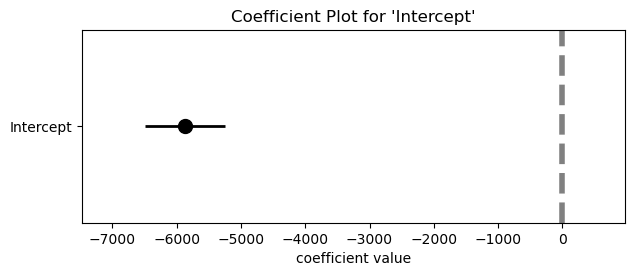

In [80]:
my_coefplot(lm_fit, var='Intercept')

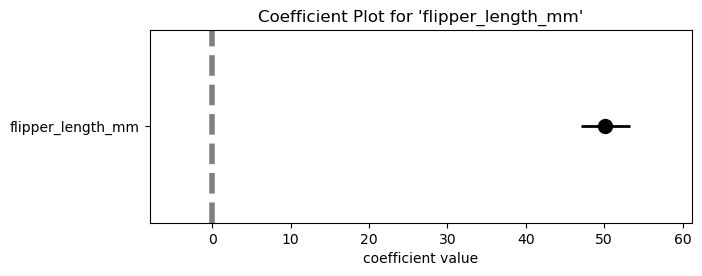

In [81]:
my_coefplot(lm_fit, var='flipper_length_mm')